![header1](../fidle/img/00-Fidle-header-01.png)

Gradient descent
================
An example of gradient descent in the simple case of a linear regression.

## Objectives :
 - To illustrate the iterative approach of a gradient descent

Equation : $ Y = X.\theta + N$  
Where N is a noise vector
and $\theta = (a,b)$ a vector as y = a.x + b

## Step 1 - Import and init


In [1]:
import numpy as np
import math
import random

import matplotlib
import matplotlib.pyplot as plt
import sys

sys.path.append('..')
import fidle.pwk as ooo

ooo.init()


FIDLE 2020 - Practical Work Module
Version              : 0.2.9
Run time             : Tuesday 18 February 2020, 17:19:03
TensorFlow version   : 2.0.0
Keras version        : 2.2.4-tf


## Step 2 - About data normalization
 
This is done by subtracting the **mean** and dividing by **standard deviation**.  
This gives a zero dispersion and a standard deviation of 1.  

The formula is : $X_{std}^{j}=\frac{X_{j}-\overline{X}_j}{\sigma_j}$  

Avec : $\sigma_j=\sqrt{\frac{1}{n}\sum_{i=1}^n\left(X_{ij}-\overline{X}_j\right)^2}
=\sqrt{\frac{1}{n}\left(\sum_{i=1}^n X_{ij}^2\right)-\overline{X}_j^2}$

Example :

In [2]:

X = np.random.uniform(-5,10,(3,1))
m = X.mean(axis=0)
s = X.std(axis=0)
print(f"\nX {X}: \n\nMean = {m}  Std = {s}")

X_norm = (X - X.mean(axis=0)) / X.std(axis=0)
m = X_norm.mean(axis=0)
s = X_norm.std(axis=0)
print(f"\nX {X}: \n\nMean = {m}  Std = {s}")


X [[6.90599018]
 [6.10824767]
 [6.34667583]]: 

Mean = [6.45363789]  Std = [0.33434408]

X [[6.90599018]
 [6.10824767]
 [6.34667583]]: 

Mean = [9.25185854e-16]  Std = [1.]


## Step 3 - A little bit of math.
Le gradient de la fonction de coût $MSE(\theta)$ est :  

$\frac{\partial MSE}{\partial a}=\frac2n\sum_{i=1}^n\left[
a \cdot x_i + b - y_i
\right] \cdot x_i
$

et 

$
\frac{\partial MSE}{\partial b}=\frac2n\sum_{i=1}^n\left[
a \cdot x_i + b - y_i
\right]
$

La modification de a et b se fait ensuite par pas progressif, avec $\eta$ appelé **taux d'apprentissage** :  

$a \leftarrow a - \eta \cdot \frac{\partial MSE}{\partial a}$

$b \leftarrow b - \eta \cdot \frac{\partial MSE}{\partial b}$

Formulation **vectorielle**, avec **n dimensions** :

$
\triangledown_\theta MSE(\Theta)=\begin{bmatrix}
\frac{\partial}{\partial \theta_0}MSE(\Theta)\\
\frac{\partial}{\partial \theta_1}MSE(\Theta)\\
\vdots\\
\frac{\partial}{\partial \theta_n}MSE(\Theta)
\end{bmatrix}=\frac2m X^T\cdot(X\cdot\Theta-Y)
$  

et :  

$\Theta \leftarrow \Theta - \eta \cdot \triangledown_\theta MSE(\Theta)$

Notes : 
- https://matthewebmckenna.com/posts/2017/05/gradient-descent-linear-regression  
- https://eli.thegreenplace.net/2016/linear-regression/  

Exemples : 
- https://github.com/eliben/deep-learning-samples/blob/master/linear-regression/multiple_linear_regression.py


## Step 4 - Preparation of learning data :

#### Before normalization :

Nombre de points : 1000000  a=25 b=-1 bruit=20
Données d'aprentissage brute :
(1000 points visibles sur 1000000)


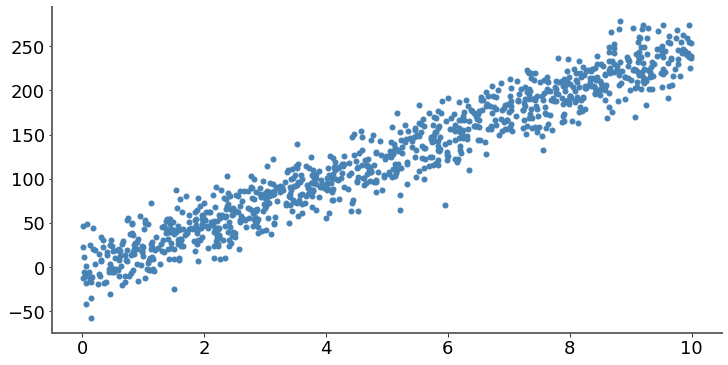

X        :      mean=     +4.9982  std=     +2.8858    min=     +0.0000    max=    +10.0000
Y        :      mean=   +123.9195  std=    +74.8698    min=    -81.9896    max=   +323.4212


#### After normalization :

Données d'aprentissage normalisées :
(1000 points visibles sur 1000000)


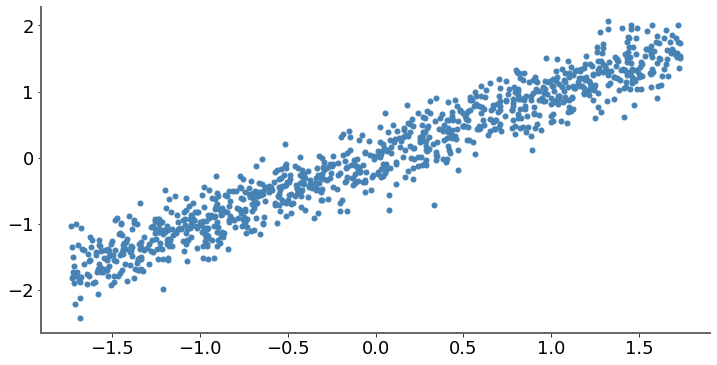

X_norm   :      mean=     +0.0000  std=     +1.0000    min=     -1.7320    max=     +1.7333
Y_norm   :      mean=     +0.0000  std=     +1.0000    min=     -2.7502    max=     +2.6646


In [3]:
# ---- Paramètres du jeu d'apprentissage ----------------

n         = 1000000     # Nombre d'observations avec y = a.x + b

xob_min   = 0      # x min and max
xob_max   = 10

a_min     = -30     # a min and max
a_max     =  30
b_min     = -10     # b min and max
b_max     =  10

noise_min =  10     # noise min and max
noise_max =  50

a0    = random.randint(a_min,a_max)       
b0    = random.randint(b_min,b_max)       
noise = random.randint(noise_min,noise_max)

# ---- Construction du jeu d'apprentissage ---------------
#      X,Y              : données brutes
#      X_norm,Y_norm    : données normaliseés

X = np.random.uniform(xob_min,xob_max,(n,1))
# N = np.random.uniform(-noise,noise,(n,1))
N = noise * np.random.normal(0,1,(n,1))

Y = a0*X + b0 + N

x_min= X.min()
x_max= X.max()
y_min= Y.min()
y_max= Y.max()

# ---- Normalisation des données --------------------------
#
def vector_infos(name,V):
    m=V.mean(axis=0).item()
    s=V.std(axis=0).item()
    print("{:8} :      mean={:+12.4f}  std={:+12.4f}    min={:+12.4f}    max={:+12.4f}".format(name,m,s,V.min(),V.max()))

X_norm = (X - X.mean(axis=0)) / X.std(axis=0)
x_norm_min= X_norm.min()
x_norm_max= X_norm.max()

Y_norm = (Y - Y.mean(axis=0)) / Y.std(axis=0)
y_norm_min= Y_norm.min()
y_norm_max= Y_norm.max()

# ---- Visualisation des données --------------------------

width = 12
height = 6
nb_viz = min(1000,n)

ooo.display_md('#### Before normalization :')
print(f"Nombre de points : {n}  a={a0} b={b0} bruit={noise}")

print("Données d'aprentissage brute :")
print(f"({nb_viz} points visibles sur {n})")
plt.figure(figsize=(width, height))
plt.plot(X[:nb_viz], Y[:nb_viz], '.')
plt.show()
vector_infos('X',X)
vector_infos('Y',Y)

ooo.display_md('#### After normalization :')
print("Données d'aprentissage normalisées :")
print(f"({nb_viz} points visibles sur {n})")
plt.figure(figsize=(width, height))
plt.plot(X_norm[:nb_viz], Y_norm[:nb_viz], '.')
plt.show()
vector_infos('X_norm',X_norm)
vector_infos('Y_norm',Y_norm)


## Step 5 - Ordinary gradient descent


 #i    Loss       Gradient          Theta
  0   +8.564   -5.500  -1.927   -2.750  +0.000
 20   +3.129   -3.300  -1.156   -1.650  +0.385
 40   +1.172   -1.980  -0.694   -0.990  +0.617
 60   +0.468   -1.188  -0.416   -0.594  +0.755
 80   +0.214   -0.713  -0.250   -0.356  +0.839
100   +0.123   -0.428  -0.150   -0.214  +0.889
120   +0.090   -0.257  -0.090   -0.128  +0.919
140   +0.078   -0.154  -0.054   -0.077  +0.937
160   +0.074   -0.092  -0.032   -0.046  +0.947
180   +0.072   -0.055  -0.019   -0.028  +0.954
200   +0.072   -0.033  -0.012   -0.017  +0.958


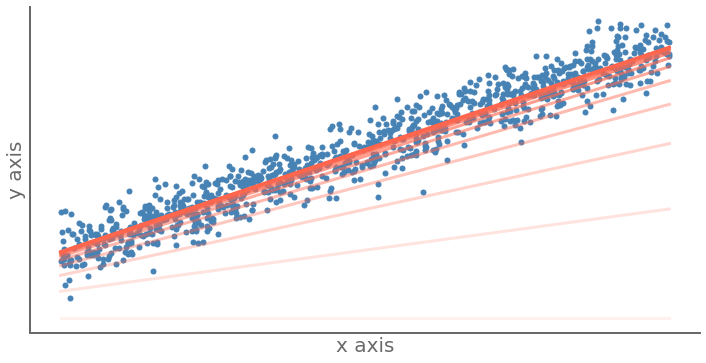

In [4]:
# ---- Settings

n_iterations   = 200     # Nombre d'itérations
eta            = 0.2    # taux d’apprentissage

# ---- Initialization

theta = np.array([[y_norm_min],[0]])
X_b = np.c_[np.ones((n, 1)), X_norm]

# ---- Visualization

Xd = np.array([[x_norm_min], [x_norm_max]])

plt.figure(figsize=(width, height))
plt.plot(X_norm[:nb_viz], Y_norm[:nb_viz], '.')
nl=0

# ---- Training

print( " #i    Loss       Gradient          Theta")
for i in range(n_iterations+1):
 
    gradient = (2/n) * X_b.T @ ( X_b @ theta - Y_norm)
    mse = ((X_b @ theta - Y_norm)**2).mean(axis=None)
    
    if (i % (n_iterations/10))==0:
        nl+=1
        Yd = Xd * theta.item(1) + theta.item(0)
        plt.plot(Xd, Yd, color=(1.,0.4,0.3,nl/11))
        print("{:3d}  {:+7.3f}  {:+7.3f} {:+7.3f}  {:+7.3f} {:+7.3f}".format(i,mse,gradient.item(0),gradient.item(1),theta.item(0),theta.item(1)))

        theta = theta - eta * gradient
        
# ---- Visualization

plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

## Step 6 - Stochastic gradient descent

theta:  a=     +0.0000 b=     -2.7502
theta:  a=     +0.9370 b=     -0.0413
theta:  a=     +1.0563 b=     -0.0384
theta:  a=     +0.9491 b=     -0.0708
theta:  a=     +1.1059 b=     -0.0765
theta:  a=     +1.0461 b=     -0.0921
theta:  a=     +1.0327 b=     -0.1740
theta:  a=     +0.8391 b=     +0.0078
theta:  a=     +1.0168 b=     -0.1202
theta:  a=     +0.8879 b=     +0.0334
theta:  a=     +0.8231 b=     +0.2508


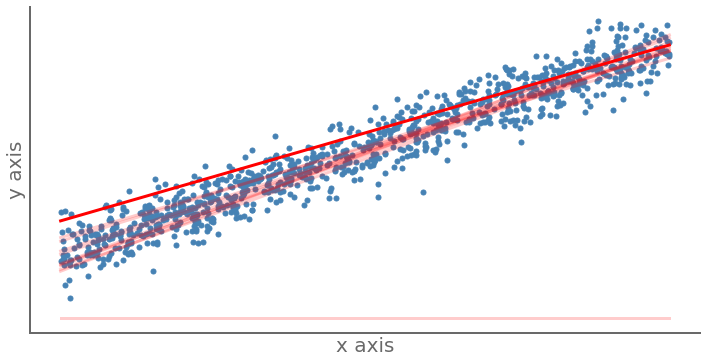

In [5]:
# ---- Settings

n_epochs     = 10     # Nombre d'epoques
n_iterations = 20   # Nombre de tirage au sort

# ---- Visualization

Xd = np.array([[x_norm_min], [x_norm_max]])

plt.figure(figsize=(width, height))
plt.plot(X_norm[:nb_viz], Y_norm[:nb_viz], '.')
nl=0

def draw_theta(theta,alpha):
    Yd = Xd * theta.item(1) + theta.item(0)
    plt.plot(Xd, Yd, color=(1.,0,0,alpha))
    print("theta:  a={:+12.4f} b={:+12.4f}".format(theta.item(1),theta.item(0)))

# ---- Training

def learning_schedule(t):
    return 5 / (t + 40)

X_b = np.c_[np.ones((n, 1)), X_norm]

theta = np.array([[y_norm_min],[0]])

for epoch in range(n_epochs):
    
    if epoch % int(n_epochs/9)==0 :
        draw_theta(theta,0.2)

    for i in range(n_iterations):
    
        random_index = np.random.randint(n)
        
        xi = X_b[random_index:random_index+1]
        yi = Y_norm[random_index:random_index+1]

        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

draw_theta(theta,1)

plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

---
![](../fidle/img/00-Fidle-logo-01_s.png)